In [9]:
from generators import LXM
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

# import matplotlib.animation as animation
# from math import sqrt, modf, exp, fabs, pi
# from scipy.stats import chi2, norm, anderson
# from numpy.random import randn
# import io
# import random
# import time
# from scipy.stats import norm, anderson
# from math import sqrt

# **Trabajo Práctico N°1**

El presente trabajo práctico fue realizado por los alumnos:

*   Anarella Nicoletta (Padrón 94551)
*   Bruno Grassano (Padrón 103855)
*   Ignacio Javier Mermet (Padrón 98153)
*   Joaquin Gomez (Padrón 103735)


# **Ejercicio 1**

Pegar imagen.

La implementación de los generadores se puede ver en el módulo `generators.py`. En este notebook resolveremos el último punto.

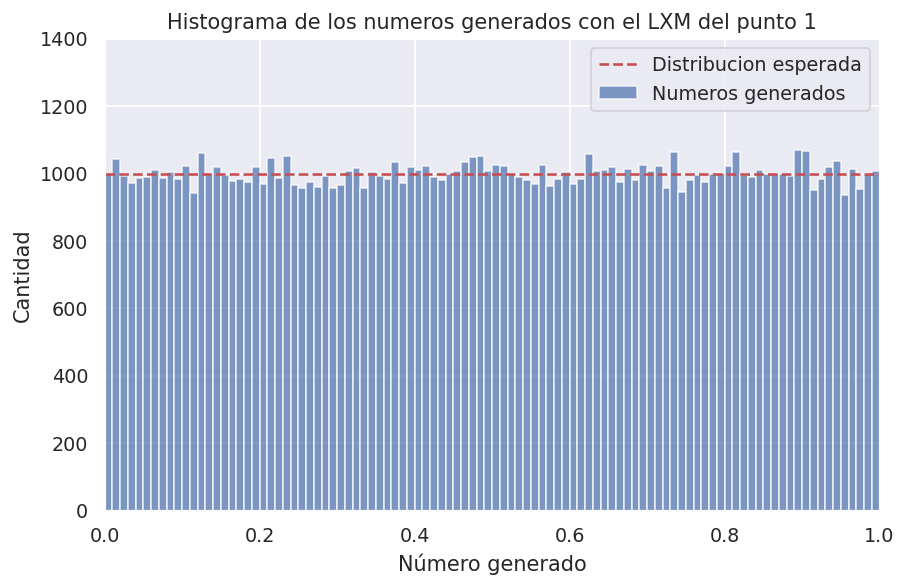

In [10]:
lxm = LXM()

n_numeros = 100_000
n_bins = 100

xn = lxm.generar_vector(n_numeros, uniforme=True)

plt.figure(figsize=(8, 5), dpi=125)
plt.hist(xn, bins=n_bins, alpha=0.7, label="Numeros generados")
plt.title("Histograma de los numeros generados con el LXM del punto 1")
plt.xlabel("Número generado")
plt.ylabel("Cantidad")

plt.axhline(
    y=n_numeros / n_bins,
    xmin=0,
    xmax=1,
    color="r",
    linestyle="--",
    label="Distribucion esperada",
)

plt.xlim(left=0, right=1)
plt.ylim(top=(n_numeros / n_bins) * 1.4)
plt.legend()

plt.show()


# **Ejercicio 2**

# **Ejercicio 3**

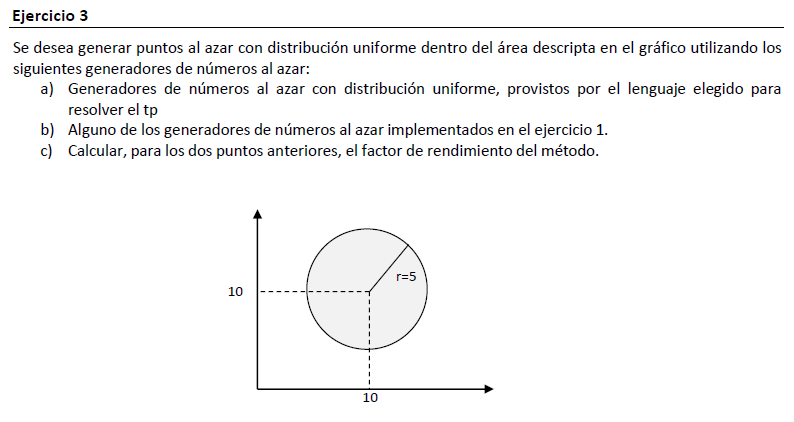

En primer lugar utilizaremos el generador de números al azar con distribución uniforme, provisto por la librería numpy del lenguaje Python.

In [12]:
MAX_RANGO = 20
N_ITERACION = 10000

# Funcion circulo
def fcv(x,y):
  return ((x - 10)**2 + (y - 10)**2 <= 25 )

def factor_de_rendimiento(validos, n_iter):
  print("Factor de rendimiento: {}/{} ({:.2f}%)\n".format(validos, n_iter, (validos/n_iter)*100))

def get_results(n_iter):
    x = [x*MAX_RANGO for x in np.random.rand(n_iter)]
    y = [y*MAX_RANGO for y in np.random.rand(n_iter)]
    X = []
    Y = []

    for i in range(n_iter):
        if fcv(x[i], y[i]):
            X.append(x[i])
            Y.append(y[i])

    factor_de_rendimiento(len(X), n_iter)
    return X, Y

Factor de rendimiento: 1970/10000 (19.70%)



<Figure size 432x288 with 0 Axes>

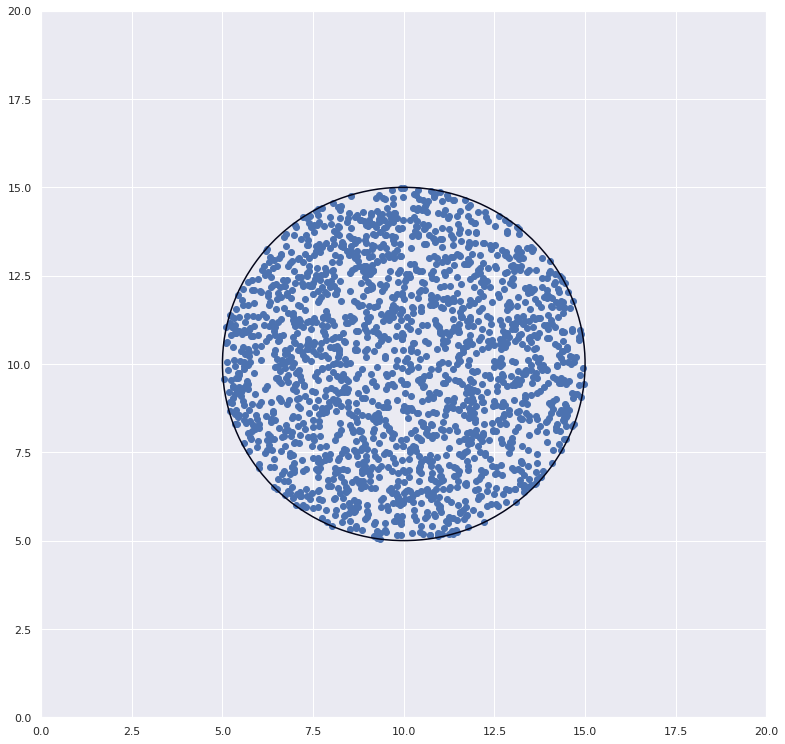

In [13]:
plt.figure(1)
plt.figure(figsize=(13, 13))

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x,y)
F = (X-10)**2 + (Y-10)**2 - 25
plt.contour(X,Y,F,[0])

plt.figure(2)
X, Y = get_results(N_ITERACION)
plt.scatter(X, Y)
plt.grid('on')
plt.ylim( (0, MAX_RANGO) ) 
plt.xlim( (0, MAX_RANGO) )

plt.show()

El rendimiento de este método es bajo, y ronda el 20%.

A continuación repetiremos el procedimiento, pero esta vez usando el generador de números al azar implementado en el ejercicio 1.

In [14]:
def get_results_Modificado(n_iter):
    lxm = LXM()

    x = [x*MAX_RANGO for x in lxm.generar_vector(n_iter, uniforme=True)]
    y = [y*MAX_RANGO for y in lxm.generar_vector(n_iter, uniforme=True)]
    X = []
    Y = []

    for i in range(n_iter):
        if fcv(x[i], y[i]):
            X.append(x[i])
            Y.append(y[i])

    factor_de_rendimiento(len(X), n_iter)
    return X, Y

Factor de rendimiento: 1924/10000 (19.24%)



<Figure size 432x288 with 0 Axes>

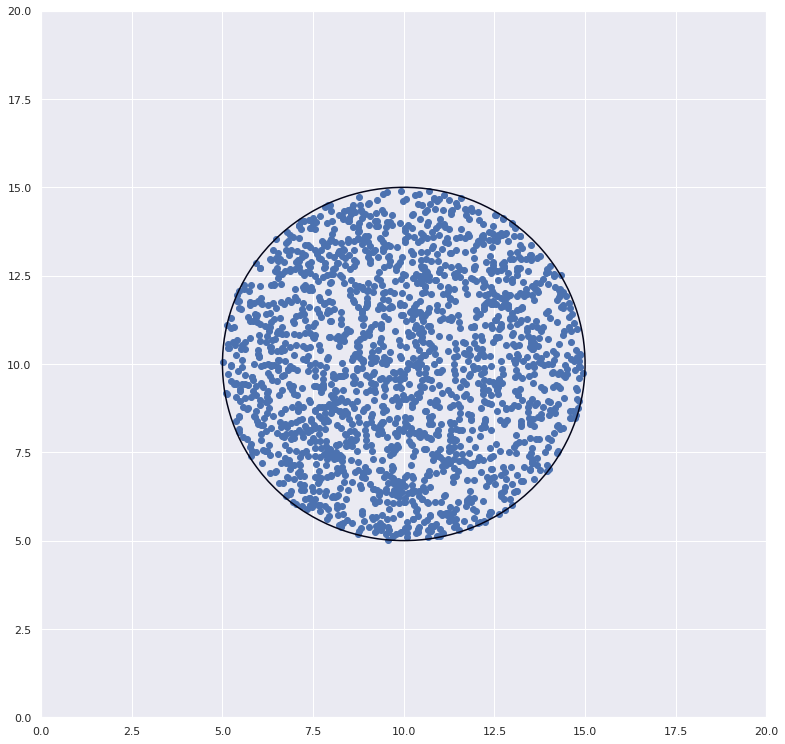

In [16]:
plt.figure(1)
plt.figure(figsize=(13, 13))

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x,y)
F = (X-10)**2 + (Y-10)**2 - 25
plt.contour(X,Y,F,[0])

plt.figure(2)
X, Y = get_results_Modificado(N_ITERACION)
plt.scatter(X, Y)
plt.grid('on')
plt.ylim( (0, MAX_RANGO) ) 
plt.xlim( (0, MAX_RANGO) )

plt.show()

Nuevamente el rendimiento es bajo, pero los resultados son muy similares a los obtenidos previamente.

# **Ejercicio 4**

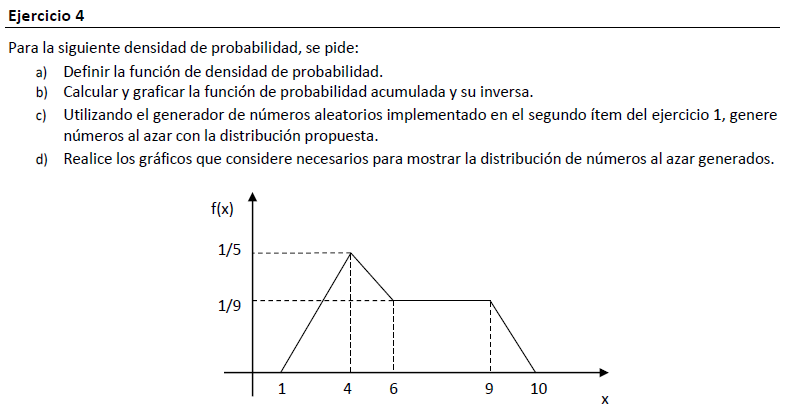

Definimos la función de densidad de probabilidad asociada a la gráfica del enunciado como

$$
f(x) = \left\{
    \begin{array}\\
        \frac{1}{15}\ x - \frac{1}{15} & \mbox{si } \ 1\leq x<4\\
        -\frac{2}{45}\ x + \frac{17}{45} & \mbox{si } \ 4\leq x<6\\
        \frac{1}{9}\ & \mbox{si } \ 6\leq x<9\\
        -\frac{1}{9}\ x + \frac{10}{9} & \mbox{si } \ 9\leq x<10\\
        0 & \mbox{en cualquier otro caso}
    \end{array}
    \right.
$$

Verificamos que se trata de una función de densidad de probabilidad válida.

$$\int_{1}^{10} f(x)dx = \int_{1}^{4} (\frac{1}{15}\ x - \frac{1}{15} ) dx + \int_{4}^{6} (-\frac{2}{45}\ x + \frac{17}{45} ) dx + \int_{6}^{9} \frac{1}{9}\  dx + \int_{9}^{10} (-\frac{1}{9}\ x + \frac{10}{9} ) dx$$

$$= \frac{1}{15}\ \int_{1}^{4} (x - 1) dx + \frac{1}{45}\ \int_{4}^{6} (-2 x + 17) dx + \int_{6}^{9} \frac{1}{9}\  dx + \frac{1}{9}\ \int_{9}^{10} (-x + 10) dx$$

$$= \frac{1}{15}\ (\frac{x^2}{2}\ -x) \Big|_1^4\ + \frac{1}{45}\ (-x^2+17x) \Big|_4^6\ + \frac{1}{9}\ (x) \Big|_6^9\ + \frac{1}{9}\ (-\frac{x^2}{2}\ +10x) \Big|_9^{10}$$

$$= \frac{1}{15}\ * \frac{9}{2}\ + \frac{1}{45}\ *14 + \frac{1}{3}\ + \frac{1}{9}\ *\frac{1}{2}$$

$$\int_{1}^{10} f(x)dx = 1$$

Procedemos a calcular la función de probabilidad acumulada para la variable aleatoria X. Para ello integramos  $f(x)$ en los distintos intervalos.

$$\int_{1}^{x} (\frac{1}{15}\ t - \frac{1}{15} ) dt=\frac{1}{15}\ (\frac{t^2}{2}\ -t) \Big|_1^x\ =\frac{1}{15}\ (\frac{x^2}{2}\ -x-\frac{1}{2}\ +1)=\frac{1}{15}\ (\frac{x^2}{2}\ -x+\frac{1}{2}\ )$$

$$\int_{4}^{x} (-\frac{2}{45}\ t + \frac{17}{45} ) dt+\frac{3}{10}=\frac{1}{45}\ (-t^2+17t) \Big|_4^x\ +\frac{3}{10}=\frac{1}{45}\ (-x^2+17x+4^2-17*4)+\frac{3}{10}=\frac{1}{45}\ (-x^2+17x-52)+\frac{3}{10}$$

$$\int_{6}^{x} (\frac{1}{9}) dt+\frac{11}{18}=\frac{1}{9}\ (t) \Big|_6^x\ +\frac{11}{18}=\frac{1}{9}\ (x-6)+\frac{11}{18}$$

$$\int_{9}^{x} (-\frac{1}{9}\ t + \frac{10}{9}) dt+\frac{17}{18}=\frac{1}{9}\ (-\frac{t^2}{2}\ +10t) \Big|_9^{x}+\frac{17}{18}=\frac{1}{9}\ (-\frac{x^2}{2}\ +10x+\frac{81}{2}\ -90) +\frac{17}{18}$$

$$
F_X(x) = \left\{
    \begin{array}\\
        0 & \mbox{si } \ x<1\\
        \frac{1}{30}\ x^2 -\frac{1}{15}\ x+\frac{1}{30}\ & \mbox{si } \ 1\leq x<4\\
        -\frac{1}{45}\ x^2+\frac{17}{45}\ x-\frac{77}{90} & \mbox{si } \ 4\leq x<6\\
        \frac{1}{9}\ x-\frac{1}{18}\ & \mbox{si } \ 6\leq x<9\\
        -\frac{1}{18}\ x^2 +\frac{10}{9}\ x-\frac{41}{9}\ & \mbox{si } \ 9\leq x<10\\
        1 & \mbox{si } \ 10\leq x
    \end{array}
    \right.
$$

In [17]:
def F_X(x):
    if x < 1:
        return 0
    elif x >= 1 and x < 4:
        return 1/30 * x**2 - 1/15 * x + 1/30
    elif x >= 4 and x < 6:
        return - 1/45 * x**2 + 17/45 * x - 77/90
    elif x >= 6 and x < 9:
        return 1/9 * x - 1/18
    elif x >= 9 and x < 10:
        return -1/18 * x**2 + 10/9 * x - 41/9
    elif x >= 10:
        return 1
    else:
        print("La función no está definida para {0}".format(x))
        raise NotImplementedError

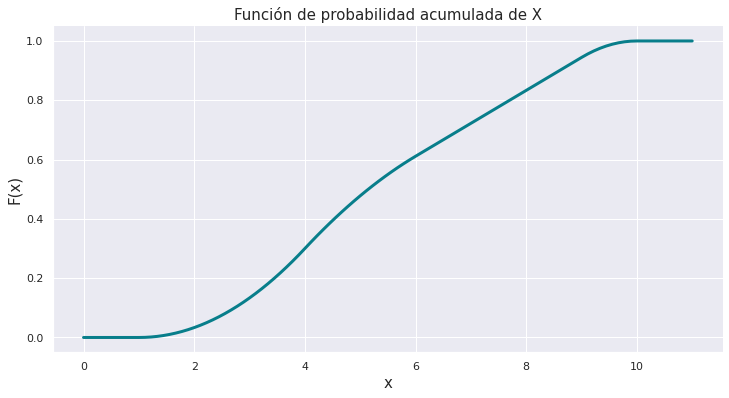

In [18]:
x = np.linspace(0 ,11, 100)
y = [F_X(i) for i in x]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(x, y, color='#087E8B', linewidth=3.0)
plt.title("Función de probabilidad acumulada de X",size=15)
plt.xlabel('x', size=15)
plt.ylabel('F(x)', size=15)
plt.show()

Para invertir $F_X(x)$ conviene expresar cada uno de los tramos cuadráticos utilizando la expresión canónica.

$$
F_X(x) = \left\{
    \begin{array}\\
        0 & \mbox{si } \ x<1\\
        \frac{1}{30}\ (x-1)^2 & \mbox{si } \ 1\leq x<4\\
        -\frac{1}{45}\ (x-\frac{17}{2}\ )^2+\frac{3}{4} & \mbox{si } \ 4\leq x<6\\
        \frac{1}{9}\ x-\frac{1}{18}\ & \mbox{si } \ 6\leq x<9\\
        -\frac{1}{18}\ (x-10)^2 +\frac{10}{9}\ x-\frac{41}{9}\ & \mbox{si } \ 9\leq x<10\\
        1 & \mbox{si } \ 10\leq x
    \end{array}
    \right.
$$

$$
F^{-1}_X(u) = \left\{
    \begin{array}\\
        1 + \sqrt{30u} & \mbox{si } \ 0\leq u<\frac{3}{10}\\
        \frac{17}{2}\ - \sqrt{-45u + \frac{135}{4}\ } & \mbox{si } \ \frac{3}{10}\ \leq u<\frac{11}{18}\\
        9u+\frac{1}{2}\ & \mbox{si } \ \frac{11}{18}\ \leq u<\frac{17}{18}\\
        10-\sqrt{-18(u-1)} & \mbox{si } \ \frac{17}{18}\ \leq u\leq1
    \end{array}
    \right.
$$

In [20]:
def F_X_inversa(u):
    if u >= 0 and u < 3/10:
        return 1 + sqrt(30*u)
    elif u >= 3/10 and u < 11/18:
        return 17/2 - sqrt(-45 * u + 135/4)
    elif u >= 11/18 and u < 17/18:
        return 9 * u +1/2
    elif u >= 17/18 and u <= 1:
        return 10 - sqrt(-18*u+18)
    else:
        print("La función no está definida para {0}".format(u))
        raise NotImplementedError

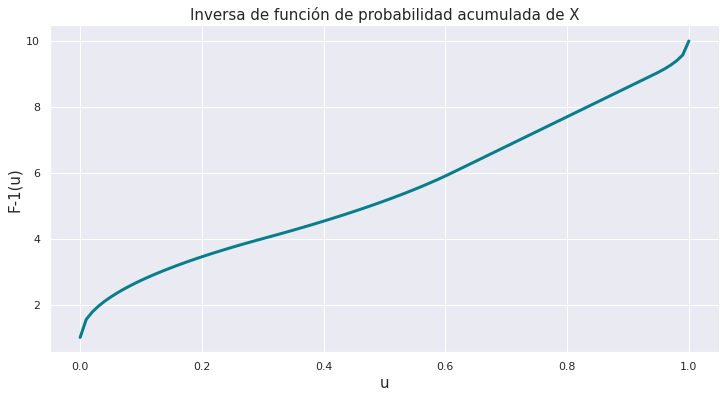

In [21]:
x = np.linspace(0 ,1, 100)
y = [F_X_inversa(i) for i in x]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Inversa de función de probabilidad acumulada de X",size=15)
plt.plot(x, y, color='#087E8B', linewidth=3.0)
plt.xlabel('u', size=15)
plt.ylabel('F-1(u)', size=15)
plt.show()

Utilizando la función inversa, vamos a generar números aleatorios que respeten la distribución analizada. Como generador de números aleatorios con densidad uniforme tendremos el LXM que desarrollamos en el ejercicio 1. Y es justamente a esa muestra de números aleatorios que le vamos a aplicar la función inversa acumulativa.

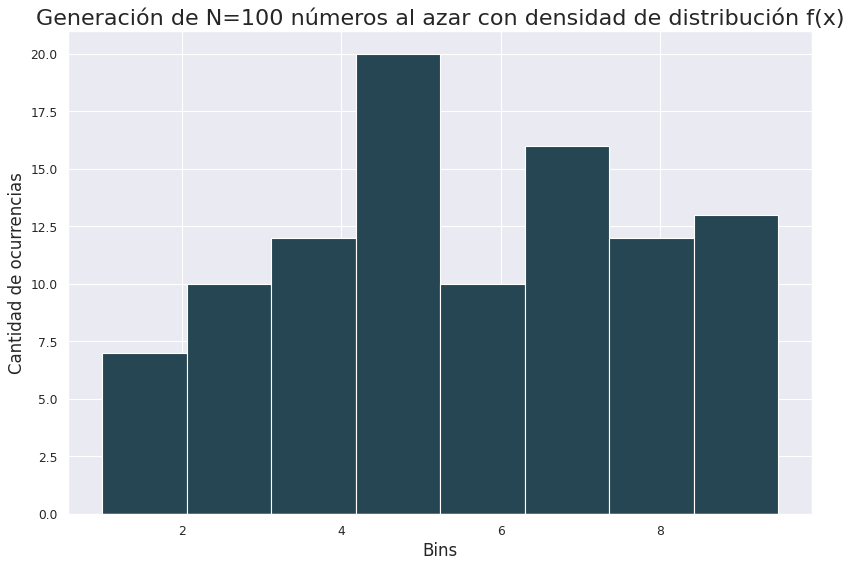

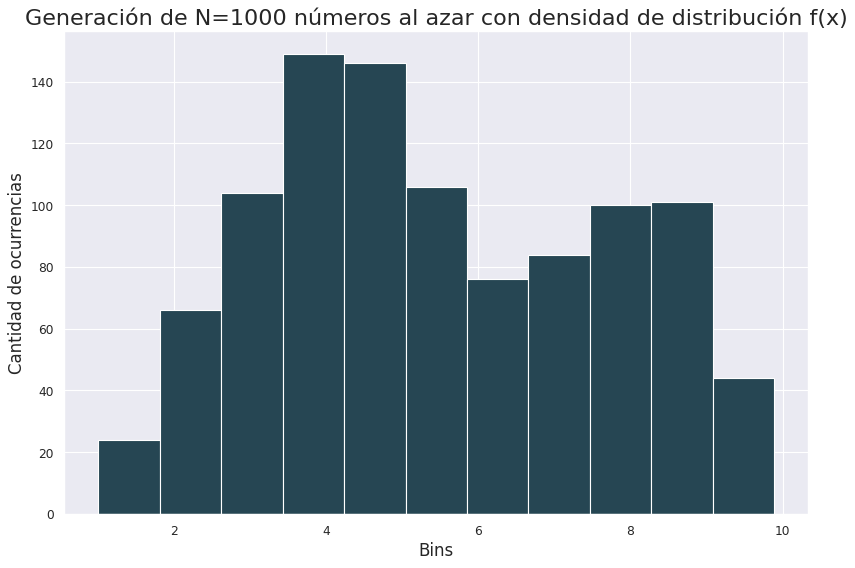

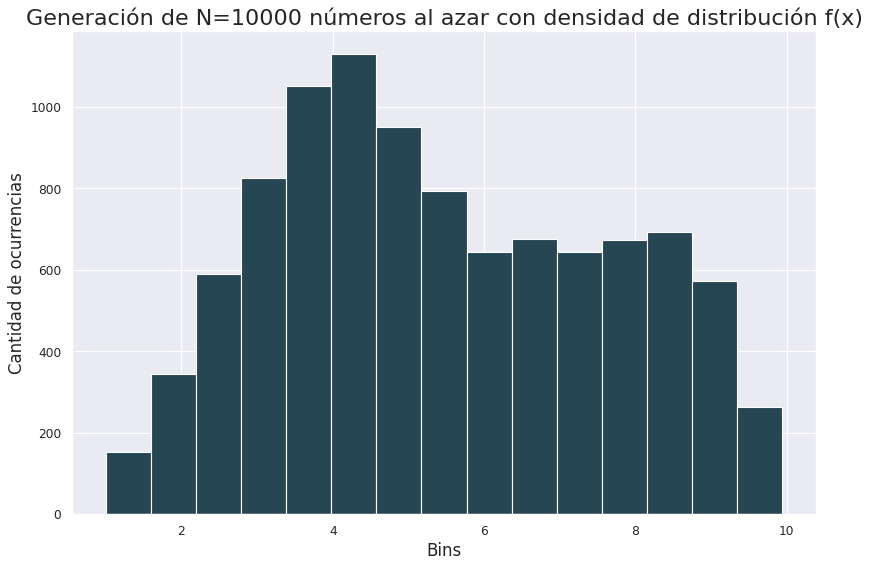

In [24]:
for N in [100, 1000, 10000]:
    lxm = LXM()
    u = lxm.generar_vector(N, uniforme=True)
    x = [F_X_inversa(ui) for ui in u]

    plt.figure(figsize=(12, 8), dpi=80)
    plt.title('Generación de N={0} números al azar con densidad de distribución f(x)'.format(N), size=20)
    plt.xlabel('Bins', size=15)
    plt.ylabel('Cantidad de ocurrencias', size=15)

    plt.hist(x, bins='sturges', color='#264653')
    plt.show()


# **Ejercicio 5**